**Authors:** Eva Paňková, Jozef Hanč, Peter Štrauch, Martina Hančová  
**R consultant:** Andrej Gajdoš <br> 
[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN) *P. J. Šafárik University in Košice, Slovakia* <br> 
email: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)

***
**<font size=6 color=brown> Research study I: Ph.D. candidates in PER</font>**

**<font size=4> Quantum questionnaire $-$ hierarchical cluster analysis</font>**  

Ireson, G. (2000). The quantum understanding of pre-university physics students. Physics Education, 35(1), 15–21. 
https://doi.org/10.1088/0031-9120/35/1/302

Paňková, E., Hanč, J. (2019). Teaching Feynman’s quantum physics at secondary schools using current digital technologies. AIP Conference Proceedings, 2152(1), 030026. https://doi.org/10.1063/1.5124770

<font size=4> Computational tool: </font> **<font size=4> R software, packages: cluster, factoextra, likert</font>**

<a id=table_of_contents></a>
 **<font size=4> Table of Contents </font>**

* **Data and tools**
    * [R libraries and functions](#libfun) - loading R packages for clustering
    * [Data preprocessing](#preprocessing) - data preparation for clustering 

* **Hierarchical clustering**
    * [Verifying cluster tree](#very) 
    * [AGNES clustering](#agnes)
    * [Heat maps and density plots for clusters](#heatdens)
    
* [References](#ref)


**To get back to the contents, use <font color=brown>the Home key</font>.**

# Data and tools

<a id=libfun></a>

## R Libraries and functions


In [1]:
# use the following commands to install libraries, if it is needed
# packages = c('cluster', clustertend', 'factoextra', 'Nbclust')
# install.packages(packages)

#libraries for clustering
library(cluster)
library(clustertend)
library(factoextra)
library(NbClust)
library(readxl)
library(dplyr)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



The concentration factor is a statistical measure calculated by formula

$C=\dfrac{\sqrt{m}}{\sqrt{m}-1}\left(\dfrac{\sqrt{\sum_{i=1}^{m} n_{i}^{2}}}{N}-\dfrac{1}{\sqrt{m}}\right)$

Basic mathematical and statistical properties of $C$:
- $C$ meets a condition $0\leqq C \leqq 1$
- $C$ is a summary measure of dealing with one mutliple choice question and it gives us information about how much students responses concentrate on answers (choices) offered by the question.
- the more students' answers are concentrated on one choice, the closer the concentration factor C is to 1. 
- $C$ = 1 means that all students chose the same answer on the question
- the more students answers are random, the closer C is to 0. 
- $C$ = 0 means uniform distribution of student's choices. 


Bao, L., & Redish, E. F. (2001). Concentration analysis: A quantitative assessment of student states. American Journal of Physics, 69(7), 45–53. https://doi.org/10.1119/1.1371253

In [2]:
## concentration factor function for a question with m choices
m <-5
concentration <- function(answers) {
    a <- length(answers[answers==1])
    b <- length(answers[answers==2])
    c <- length(answers[answers==3])
    d <- length(answers[answers==4])
    e <- length(answers[answers==5])
    suma <- a*a + b*b + c*c + d*d + e*e
    factor <- (sqrt(m)/(sqrt(m)-1)) * (sqrt(suma)/length(answers) - 1/sqrt(m))
    factor
} 

<a id=preprocessing></a>
## Data loading and preprocessing

In [3]:
# results of students in Ireson QQ
students <- as.data.frame(read_excel("../data/01_Ireson_results_students.xlsx", col_names = T))

In [4]:
# types of data - structure 
str(students, list.len = 5)

'data.frame':	32 obs. of  30 variables:
 $ student: chr  "A.Al" "A.ÄŚe" "D.DO" "D.GR" ...
 $ B01    : num  3 1 2 2 5 4 2 4 3 2 ...
 $ B02    : num  4 4 5 4 5 5 5 3 5 4 ...
 $ B03    : num  5 3 2 4 4 3 4 5 1 3 ...
 $ B04    : num  4 2 3 3 4 3 4 4 4 4 ...
  [list output truncated]


In [5]:
# first five rows of the data frame
head(students, 5)  

student,B01,B02,B03,B04,B06,B07,B08,B09,B10,⋯,B25,B26,B27,B28,B30,B31,B33,B35,B36,B39
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.Al,3,4,5,4,2,5,4,1,5,⋯,4,2,1,1,5,1,1,1,1,5
A.ÄŚe,1,4,3,2,2,1,4,3,1,⋯,4,2,4,2,3,3,4,1,5,1
D.DO,2,5,2,3,1,2,5,3,4,⋯,2,3,1,4,4,2,3,2,5,3
D.GR,2,4,4,3,2,1,5,4,3,⋯,1,2,4,2,2,4,2,2,4,2
D.HA,5,5,4,4,2,5,2,2,2,⋯,4,4,2,2,3,1,2,2,2,5


In [6]:
# data size - sample and questions
Ns <- nrow(students)    # sample size - number of students (observations)
Nq <- ncol(students)-1  # number of variables (questions)
c(Ns,Nq)   

[1] 32 29

In [7]:
# Questions of Ireson QQ
questions <- as.data.frame(read_excel("../data/01_Ireson_results_questions.xlsx", col_names = T))

In [8]:
# questions as the index
rownames(questions)<-questions$question

# set categorical variables
questions$dimension<-as.factor(questions$dimension)
questions$object<-as.factor(questions$object)
questions

,idx,question,dimension,object,position,text
,<dbl>,<chr>,<fct>,<fct>,<dbl>,<chr>
B01,1,B01,atoms,atoms,1,The structure of the atom is similar to the way planets orbit the sun.
B02,2,B02,electrons-visualization,electrons,2,It is possible to have a visual 'image' of an electron.
B03,3,B03,atoms,atoms,3,The energy of an atom can have any value.
B04,4,B04,atoms,atoms,4,The atom is stable due to a 'balance' between an attractive electric force and the movement of the electron.
B06,5,B06,atoms,atoms,6,"Coulomb's law, electromagnetism and Newtonian mechanics cannot explain why atoms are stable."
B07,6,B07,electrons-visualization,electrons,7,The electron is always a particle.
B08,7,B08,atoms,atoms,8,An atom cannot be visualized.
B09,8,B09,photons,photons,9,Light always behaves as a wave.
B10,9,B10,electrons-motion,electrons,10,In passing through a gap electrons continue to move along straight line paths.


## Data wrangling for cluster analysis

In [9]:
# only students' answers
data <- students[,2:(Nq+1)]

# adding columns for questions - centered score and concentration 
questions$score <- colMeans(data)-3
questions$concentration <- apply(data, 2, concentration)

In [10]:
head(questions, 5)

,idx,question,dimension,object,position,text,score,concentration
,<dbl>,<chr>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<dbl>
B01,1,B01,atoms,atoms,1,The structure of the atom is similar to the way planets orbit the sun.,0.25000,0.09195134
B02,2,B02,electrons-visualization,electrons,2,It is possible to have a visual 'image' of an electron.,0.90625,0.21793381
B03,3,B03,atoms,atoms,3,The energy of an atom can have any value.,0.62500,0.09901787
B04,4,B04,atoms,atoms,4,The atom is stable due to a 'balance' between an attractive electric force and the movement of the electron.,0.31250,0.33286901
B06,5,B06,atoms,atoms,6,"Coulomb's law, electromagnetism and Newtonian mechanics cannot explain why atoms are stable.",-0.75000,0.23949135


In [11]:
# dataframe for cluster analysis
df = select(questions, score, concentration)
head(df, 3)

,score,concentration
,<dbl>,<dbl>
B01,0.25000,0.09195134
B02,0.90625,0.21793381
B03,0.62500,0.09901787


In [12]:
# type of question - photon or electron
dfq = select(questions, score, concentration, dimension, object)
head(dfq,3)

,score,concentration,dimension,object
,<dbl>,<dbl>,<fct>,<fct>
B01,0.25000,0.09195134,atoms,atoms
B02,0.90625,0.21793381,electrons-visualization,electrons
B03,0.62500,0.09901787,atoms,atoms


# Hierarchical clustering

<a id=very></a>
## Verifying cluster tree

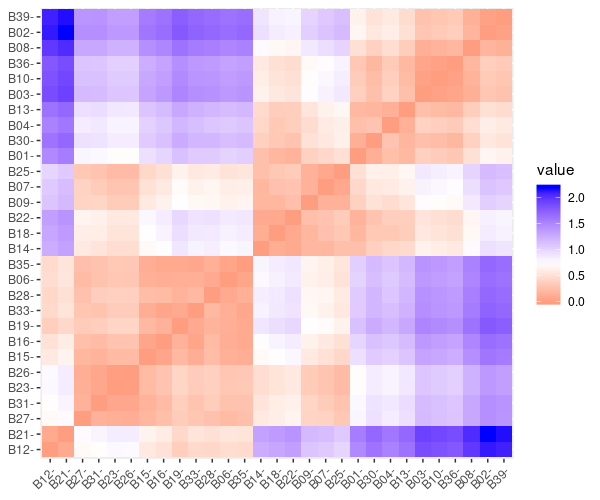

In [13]:
# Compute the dissimilarity matrix
# df = the standardized data
res.dist <- dist(df, method = "euclidean")

options(repr.plot.res=100, repr.plot.height=5, repr.plot.width=6)
fviz_dist(res.dist)

In [14]:
# Compute cophentic distance
res.hc <- hclust(d = res.dist, method = "ward.D2")
res.coph <- cophenetic(res.hc)
# Correlation between cophenetic distance and
# the original distance
cor(res.dist, res.coph)

[1] 0.7440953

In [15]:
res.hc2 <- hclust(res.dist, method = "average")
cor(res.dist, cophenetic(res.hc2))

[1] 0.7542947

In [16]:
# Compute Hopkins statistic for dataset
set.seed(20)
hopkins(df, n = nrow(df)-1)

$H
[1] 0.4380044

<a id=agnes></a>
## AGglomerative NESting - Fig 3

In [17]:
res.agnes <- agnes(x = df, # data matrix
stand = TRUE, # Standardize the data
metric = "euclidean", # metric for distance matrix
method = "ward" # Linkage method
)

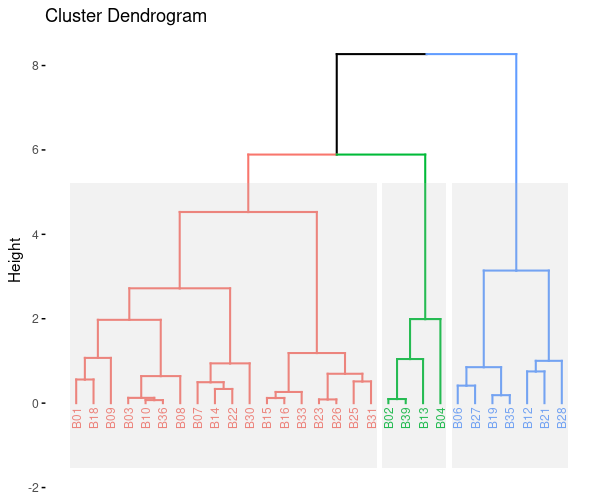

In [18]:
fviz_dend(res.agnes, 
          cex = 0.6, 
          k = 3,
          rect=TRUE, 
          rect_fill = TRUE)

In [19]:
# best result
grp <- cutree(res.agnes, k = 3)

cp<-fviz_cluster(list(data = df, cluster = grp), 
            geom = c("point", "text"),
            choose.vars = c("score", "concentration"),
            main = "", # "Cluster plot for S-C diagram of Quantum Questionary", 
            stand = FALSE, 
            repel = TRUE,
            pointsize = 2.5,
            show.clust.cent = FALSE,
            ellipse.type = "convex") + 
    theme_bw() 

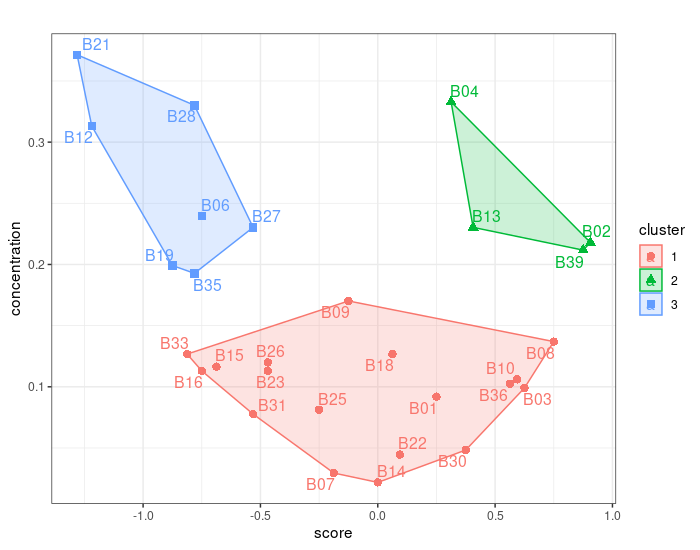

In [20]:
#options(repr.plot.res=100, repr.plot.height=7, repr.plot.width=10)
options(repr.plot.res=100, repr.plot.height=5.5, repr.plot.width=7)
cp

In [21]:
unique(dfq$object)

[1] atoms     electrons photons  
Levels: atoms electrons photons

In [22]:
cp2 <- cp +
geom_point(aes(x=dfq$score, y=dfq$concentration, shape=dfq$object),size = 2.5) +
scale_shape_manual(values=c(16, 16, 16, 5, 1, 8, 10), 
                   breaks = c("atoms", "electrons", "photons"), 
                   labels = c("atom question", "electron question", "photon question"))+
guides(shape=guide_legend("questions", override.aes=list(size = 4)))

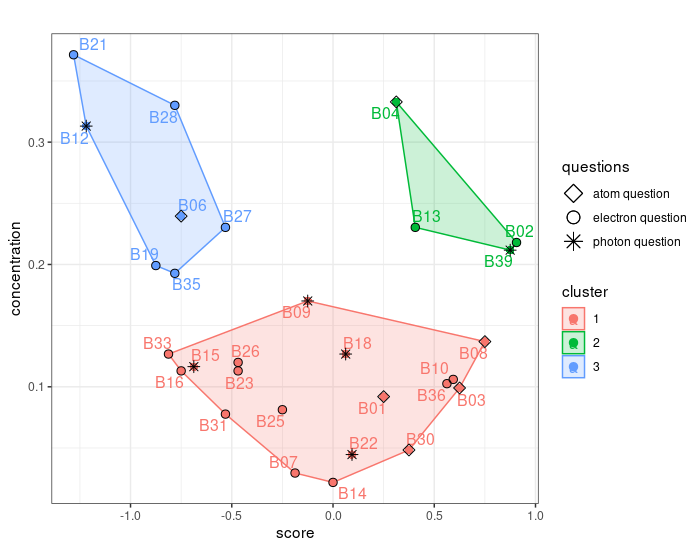

In [23]:
cp2

In [24]:
#save file
#ggsave('clusterplotSC_SK_300dpi.png', width=7, height=5.5, dpi=300)

In [25]:
# members of clusters
red <- rownames(df)[grp == 1]
red

[1] "B01" "B03" "B07" "B08" "B09" "B10" "B14" "B15" "B16" "B18" "B22" "B23"
[13] "B25" "B26" "B30" "B31" "B33" "B36"

In [26]:
green <- rownames(df)[grp == 2]
green

[1] "B02" "B04" "B13" "B39"

In [27]:
blue <- rownames(df)[grp == 3]
blue

[1] "B06" "B12" "B19" "B21" "B27" "B28" "B35"

<a id=heatdens></a>
# Heatmaps and density plots for clusters

In [28]:
#install.packages('likert')
library(likert)

Loading required package: xtable

Attaching package: ‘likert’

The following object is masked from ‘package:dplyr’:

    recode



In [29]:
data

B01,B02,B03,B04,B06,B07,B08,B09,B10,B12,⋯,B25,B26,B27,B28,B30,B31,B33,B35,B36,B39
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,4,5,4,2,5,4,1,5,1,⋯,4,2,1,1,5,1,1,1,1,5
1,4,3,2,2,1,4,3,1,2,⋯,4,2,4,2,3,3,4,1,5,1
2,5,2,3,1,2,5,3,4,3,⋯,2,3,1,4,4,2,3,2,5,3
2,4,4,3,2,1,5,4,3,2,⋯,1,2,4,2,2,4,2,2,4,2
5,5,4,4,2,5,2,2,2,3,⋯,4,4,2,2,3,1,2,2,2,5
4,5,3,3,3,4,3,3,1,3,⋯,3,2,2,1,5,3,4,5,3,4
2,5,4,4,4,2,5,5,4,2,⋯,1,2,4,2,4,2,3,2,4,4
4,3,5,4,1,3,3,3,2,1,⋯,3,1,1,2,5,1,1,4,2,5
3,5,1,4,2,1,4,1,5,1,⋯,1,1,4,5,3,1,1,2,5,1


In [30]:
# setting answers as categorical variables

# setting names of levels of scale and names of columns
mylevels <- c('strongly agree', 'agree', 'neutral', 'disagree', 'strongly disagree')

dff = data
col_names <- names(dff)

In [31]:
dff[,col_names]<- lapply(dff[,col_names], factor, levels=1:5, labels = mylevels)
head(dff,1)

B01,B02,B03,B04,B06,B07,B08,B09,B10,B12,⋯,B25,B26,B27,B28,B30,B31,B33,B35,B36,B39
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
neutral,disagree,strongly disagree,disagree,agree,strongly disagree,disagree,strongly agree,strongly disagree,strongly agree,⋯,disagree,agree,strongly agree,strongly agree,strongly disagree,strongly agree,strongly agree,strongly agree,strongly agree,strongly disagree


In [32]:
# copy of dataframe dff with full text names
dff.questions<-dff     
names(dff.questions)<- paste(questions$question, questions$text, sep=" ")

In [33]:
head(dff.questions,5)

B01 The structure of the atom is similar to the way planets orbit the sun.,B02 It is possible to have a visual 'image' of an electron.,B03 The energy of an atom can have any value.,B04 The atom is stable due to a 'balance' between an attractive electric force and the movement of the electron.,"B06 Coulomb's law, electromagnetism and Newtonian mechanics cannot explain why atoms are stable.",B07 The electron is always a particle.,B08 An atom cannot be visualized.,B09 Light always behaves as a wave.,B10 In passing through a gap electrons continue to move along straight line paths.,B12 The photon is a sort of 'energy particle'.,⋯,B25 Electrons move around the nucleus in definite orbits with a high velocity.,B26 When a beam of electrons produces a diffraction pattern it is because the electrons themselves are undergoing constructive and destructive interference.,B27 Electrons move randomly around the nucleus within a certain region or at a certain distance.,B28 Whether one labels an electron a 'particle' or 'wave' depends on the particular experiment being carried out.,B30 If a container has a few gas molecules in it and we know their instantaneous positions and velocities then we can use Newtonian mechanics to predict exactly how they will behave as time goes by.,B31 During the emission of light from atoms electrons follow a definite path as they move from one energy level to another.,B33 Individual electrons are fired towards a very narrow slit. On the other side is a photographic plate. What happens is that the electrons strike the plate one by one and gradually build up a diffraction pattern.,B35 Electrons are fixed in their shells.,B36 Orbits of electrons are not exactly determined.,"B39 The photon is a small, spherical entity."
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
neutral,disagree,strongly disagree,disagree,agree,strongly disagree,disagree,strongly agree,strongly disagree,strongly agree,⋯,disagree,agree,strongly agree,strongly agree,strongly disagree,strongly agree,strongly agree,strongly agree,strongly agree,strongly disagree
strongly agree,disagree,neutral,agree,agree,strongly agree,disagree,neutral,strongly agree,agree,⋯,disagree,agree,disagree,agree,neutral,neutral,disagree,strongly agree,strongly disagree,strongly agree
agree,strongly disagree,agree,neutral,strongly agree,agree,strongly disagree,neutral,disagree,neutral,⋯,agree,neutral,strongly agree,disagree,disagree,agree,neutral,agree,strongly disagree,neutral
agree,disagree,disagree,neutral,agree,strongly agree,strongly disagree,disagree,neutral,agree,⋯,strongly agree,agree,disagree,agree,agree,disagree,agree,agree,disagree,agree
strongly disagree,strongly disagree,disagree,disagree,agree,strongly disagree,agree,agree,agree,neutral,⋯,disagree,disagree,agree,agree,neutral,strongly agree,agree,agree,agree,strongly disagree


In [34]:
# identifying indices of cols in questions corresponding to a cluster
indexq <-function(name) grep(name,colnames(dff.questions))
sapply(green,indexq)

B02 B04 B13 B39 
  2   4  11  29

## <font color=green> Green cluster - Fig 3 </font>

In [35]:
title <- 'Green cluster'

resultheat <- likert(dff[,green])
resultdens <- likert(dff.questions[,sapply(green, indexq)])

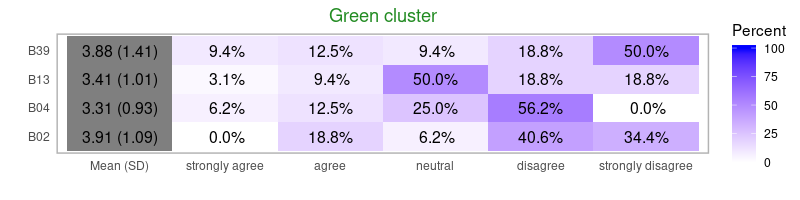

In [36]:
# heat map 
options(repr.plot.res=100, repr.plot.height=length(green)/2, repr.plot.width=8)
plot(resultheat, type ='heat') + #scale_fill_continuous(name = "New Legend Title")  +
ggtitle(title)+theme(plot.title = element_text(hjust = 0.5, colour = 'forestgreen'))

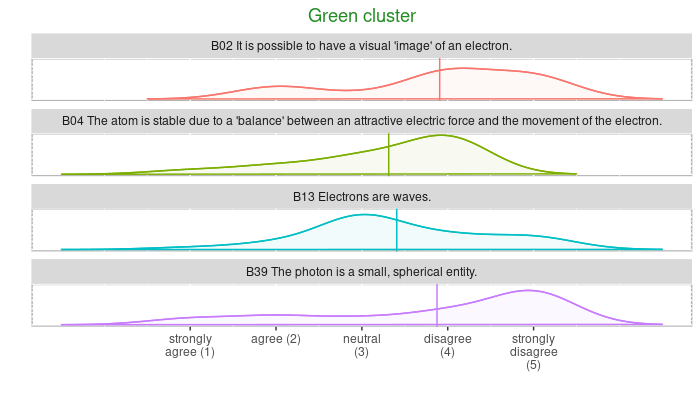

In [37]:
# density
options(repr.plot.res=100, repr.plot.height=length(green), repr.plot.width=7)
plot(resultdens, type="density", facet = TRUE, bw = 0.5) +
ggtitle(title)+theme(plot.title = element_text(hjust = 0.5, colour = 'forestgreen'))

In [38]:
#ggsave('greencluster_300dpi.png', width=7, height=length(green), dpi=300)

## <font color=blue> Blue cluster </font>

In [39]:
# cluster blue
title <- 'Blue cluster'
resultheat <- likert(dff[,blue])
resultdens <- likert(dff.questions[,sapply(blue, indexq)])

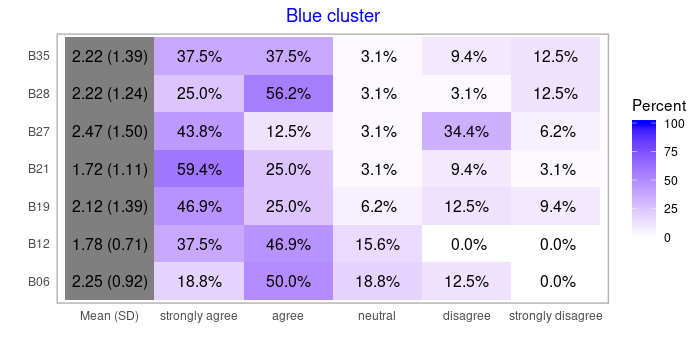

In [40]:
# heat map 
options(repr.plot.res=100, repr.plot.height=length(blue)/2, repr.plot.width=7)
plot(resultheat, type ='heat') +
ggtitle(title)+theme(plot.title = element_text(hjust = 0.5, colour = 'blue'))

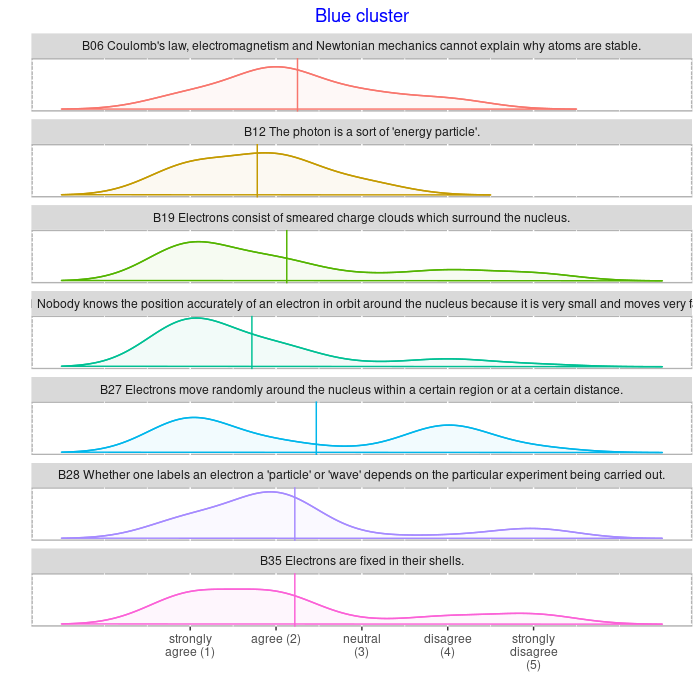

In [41]:
# density
options(repr.plot.res=100, repr.plot.height=length(blue), repr.plot.width=7)
plot(resultdens, type="density", facet = TRUE, bw = 0.5) +
ggtitle(title)+theme(plot.title = element_text(hjust = 0.5, colour = 'blue'))

## <font color=red> Red cluster </font>

In [42]:
# cluster blue
title <- 'Red cluster'
resultheat <- likert(dff[,red])
resultdens <- likert(dff.questions[,sapply(red, indexq)])

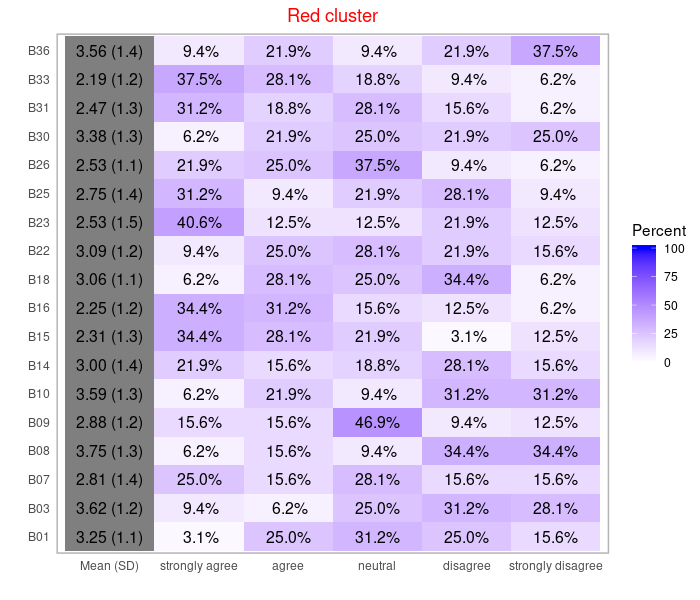

In [43]:
# heat map 
options(repr.plot.res=100, repr.plot.height=length(red)/3, repr.plot.width=7)
plot(resultheat, type ='heat') +
ggtitle(title)+theme(plot.title = element_text(hjust = 0.5, colour = 'red'))

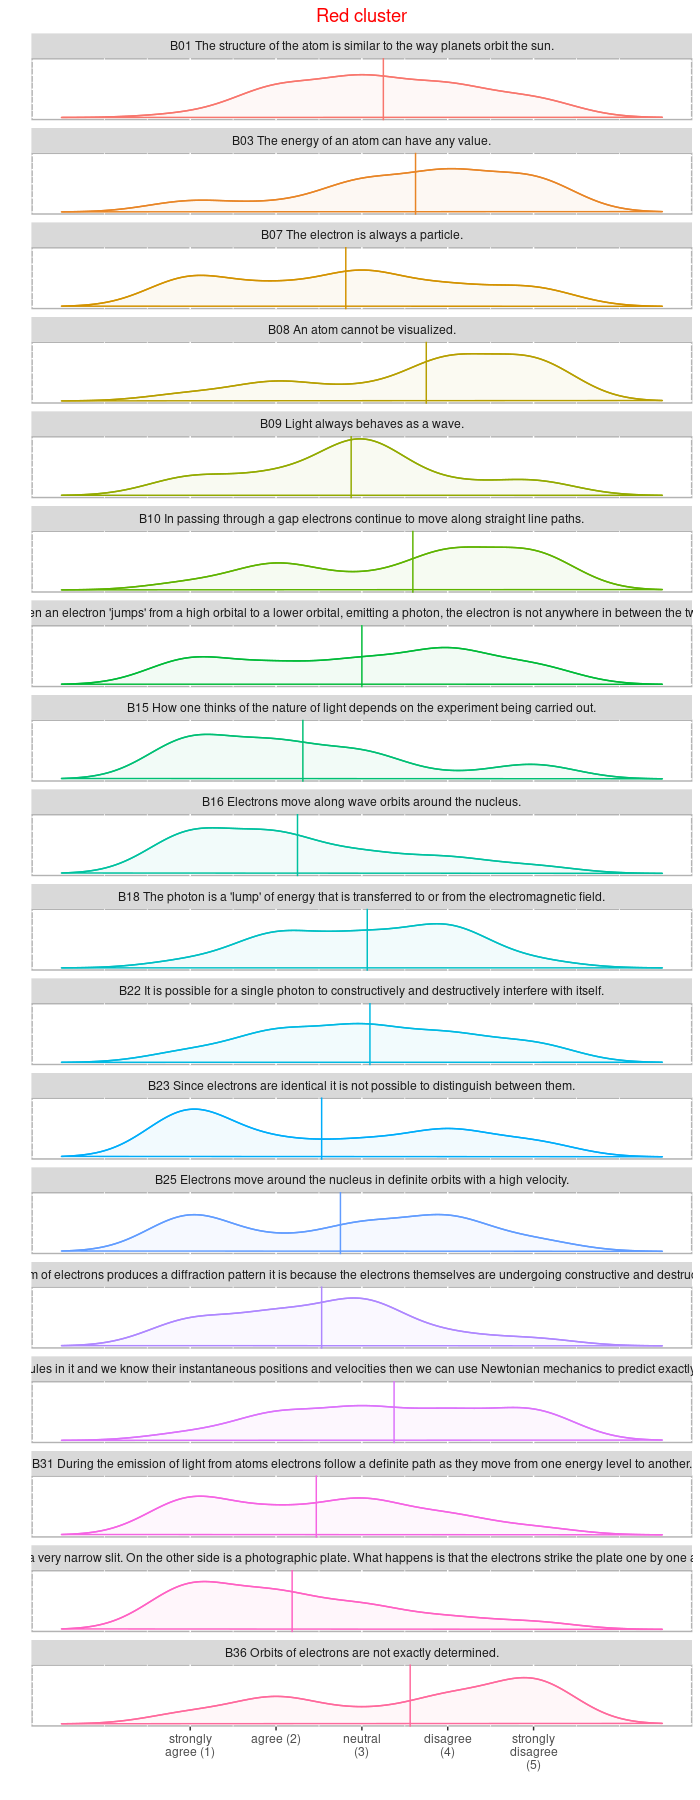

In [44]:
# density
options(repr.plot.res=100, repr.plot.height=length(red), repr.plot.width=7)
plot(resultdens, type="density", facet = TRUE, bw = 0.5) +
ggtitle(title)+theme(plot.title = element_text(hjust = 0.5, colour ='red'))

***
<a id=ref></a>
# References - Clustering

- Kassambara, A. (2017). Practical Guide to Cluster Analysis in R: Unsupervised Machine Learning (1st ed.). http://www.sthda.com: STHDA.

- EMC Education Services. (2015). Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data (1 edition). Wiley.

